<a href="https://colab.research.google.com/github/Asfiya-edu/NewYork-AirBnb-Case-Study-Machine-Learning/blob/main/New_York_City_AirBnb_ML_Case_Study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **New York City AirBnb ML Case Study**

**Project Type** - EDA/Unsupervised Clustering

**Contribution** - Individual

# **1.   Defining the problem statement**


**Business Objective:**

The business objective is to enhance the user experience and improve the efficiency of Airbnb services in New York City by providing personalized recommendations to users. The goal is to cluster Airbnb listings based on various features and characteristics, allowing for more tailored recommendations and improved customer satisfaction.

**Desired Outcome for Data Science Project:**

The desired outcome is to develop a clustering model that groups Airbnb listings into meaningful clusters. These clusters should reflect similar characteristics and preferences, enabling Airbnb to offer personalized recommendations to users. The clustering model aims to reveal patterns in the dataset, providing insights into the diverse range of listings in New York City.

**Problem Statement:**

Develop a machine learning clustering model using the provided dataset with columns such as 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', etc. The objective is to cluster Airbnb listings based on these features, allowing for the identification of similar groups of listings.

1. **Identify Meaningful Clusters:**
   - Discover and define clusters that represent meaningful groupings of Airbnb listings. These clusters might include, for example, high-end luxury listings, budget-friendly options, family-friendly accommodations, or unique and niche offerings.

2. **Personalized Recommendations:**
   - Leverage the clustering model to provide personalized recommendations to users. When a user expresses interest in a particular listing, recommend other listings from the same cluster, enhancing the user experience and increasing the likelihood of a successful booking.

3. **Improve Search and Filtering:**
   - Enhance Airbnb's search and filtering functionalities by incorporating the clustering results. Allow users to filter and search for listings based on specific clusters, helping them find options that closely match their preferences.

4. **Optimize Business Operations:**
   - Provide insights to Airbnb hosts and management by highlighting the characteristics and preferences associated with each cluster. This information can be used to optimize pricing strategies, improve listing descriptions, and tailor promotional efforts.

5. **Increase Customer Satisfaction:**
   - By offering more personalized and relevant recommendations, the clustering model aims to increase overall customer satisfaction. Users are more likely to find accommodations that align with their preferences, leading to positive reviews and repeat bookings.

**Evaluation Metrics:**
   - Evaluate the clustering model based on metrics such as silhouette score, Davies-Bouldin index, or domain-specific criteria. The goal is to ensure that listings within a cluster are more similar to each other than to listings in other clusters.

**Implementation:**
   - Implement a clustering algorithm (e.g., K-Means, DBSCAN) to create the clusters based on the provided features. Fine-tune the model and assess its performance. Integrate the model into the Airbnb platform for real-time recommendations.

By achieving the desired outcome, Airbnb aims to provide a more personalized and enjoyable experience for users, increase the likelihood of successful bookings, and optimize business operations based on a deeper understanding of listing characteristics.

#**2. Data Collection**


In [ ]:
pip install folium

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
filepath= "/content/drive/MyDrive/alma better/Airbnb NYC.csv"
df = pd.read_csv(filepath)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


## **Dataset Information**

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### **Description of columns:**

Here is a brief description of each column in the provided Airbnb dataset:

1. **id:** The unique identifier for each Airbnb listing.

2. **name:** The title or name of the Airbnb listing.

3. **host_id:** The unique identifier for the host of the listing.

4. **host_name:** The name of the host who manages the listing.

5. **neighbourhood_group:** The borough or district within New York City where the listing is located.

6. **neighbourhood:** The specific neighborhood within the borough where the listing is situated.

7. **latitude:** The geographic latitude of the listing's location.

8. **longitude:** The geographic longitude of the listing's location.

9. **room_type:** The type of room or accommodation offered (e.g., entire home/apartment, private room, shared room).

10. **price:** The nightly price for renting the listing.

11. **minimum_nights:** The minimum number of nights required for booking.

12. **number_of_reviews:** The total number of reviews that the listing has received.

13. **last_review:** The date of the last review for the listing.

14. **reviews_per_month:** The average number of reviews the listing receives per month.

15. **calculated_host_listings_count:** The count of listings managed by the host.

16. **availability_365:** The number of days the listing is available for booking in a year.

# **3. Data Preprocessing**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Check Unique Values for each variable.
print(df.apply(lambda col:col.unique()))

id                                [2539, 2595, 3647, 3831, 5022, 5099, 5121, 517...
name                              [Clean & quiet apt home by the park, Skylit Mi...
host_id                           [2787, 2845, 4632, 4869, 7192, 7322, 7356, 896...
host_name                         [John, Jennifer, Elisabeth, LisaRoxanne, Laura...
neighbourhood_group               [Brooklyn, Manhattan, Queens, Staten Island, B...
neighbourhood                     [Kensington, Midtown, Harlem, Clinton Hill, Ea...
latitude                          [40.64749, 40.75362, 40.80902, 40.68514, 40.79...
longitude                         [-73.97237, -73.98377, -73.9419, -73.95976, -7...
room_type                              [Private room, Entire home/apt, Shared room]
price                             [149, 225, 150, 89, 80, 200, 60, 79, 135, 85, ...
minimum_nights                    [1, 3, 10, 45, 2, 5, 4, 90, 7, 14, 60, 29, 30,...
number_of_reviews                 [9, 45, 0, 270, 74, 49, 430, 118, 160, 53,

In [ ]:
# Percentage of null values in columns
null_percentage = df[['last_review', 'reviews_per_month', 'host_name', 'name']].isnull().mean() * 100
null_percentage.sort_values(ascending=False)

last_review          20.558339
reviews_per_month    20.558339
host_name             0.042949
name                  0.032723
dtype: float64

In [ ]:
df.shape

(48895, 16)

### **Handling Missing Data**

In [ ]:
# Dropping rows with na values
df = df.dropna(subset=['host_name', 'name'])

In [ ]:
df.shape

(48858, 16)

In [ ]:
df['last_review']=pd.to_datetime(df['last_review'])

<ipython-input-14-165e3ea93c35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review']=pd.to_datetime(df['last_review'])


In [ ]:
# Handling missing data using median and mode
median_last_review = df['last_review'].median()
mode_reviews_per_month = df['reviews_per_month'].mode()[0]

df['last_review'].fillna(value=median_last_review, inplace=True)
df['reviews_per_month'].fillna(value=mode_reviews_per_month, inplace=True)

In [ ]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# **4. Exploratory Data Analysis (EDA) - Uncover Insights, Ignite Understanding.**

4.1. Distribution Analysis: Utilize summary statistics, histograms, and box plots to understand data distribution.

4.2. Bivariate Analysis: Examine relationships between two variables using scatter plots and bar charts.

4.3. Multivariate Analysis & Feature Relationships: Explore complex interrelationships using tools like heatmaps and pair plots.

4.4. Temporal Analysis: Study data patterns and trends over time.

4.5. Categorical Data Analysis: Visualize categorical data through bar and pie charts.

4.6. Dimensionality Reduction Visualization (PCA): Reduce data dimensions and visualize using PCA.

4.7. Statistical & Hypothesis Tests: Apply tests like t-test and chi-square to validate assumptions.

4.8. Complex Data Type Visualization: Visualize text data using word clouds, images with distribution insights.

4.9. Geospatial Analysis: Analyze data in relation to geographical locations.

4.10. Segmentation Analysis: Identify data clusters or segments for further insights.

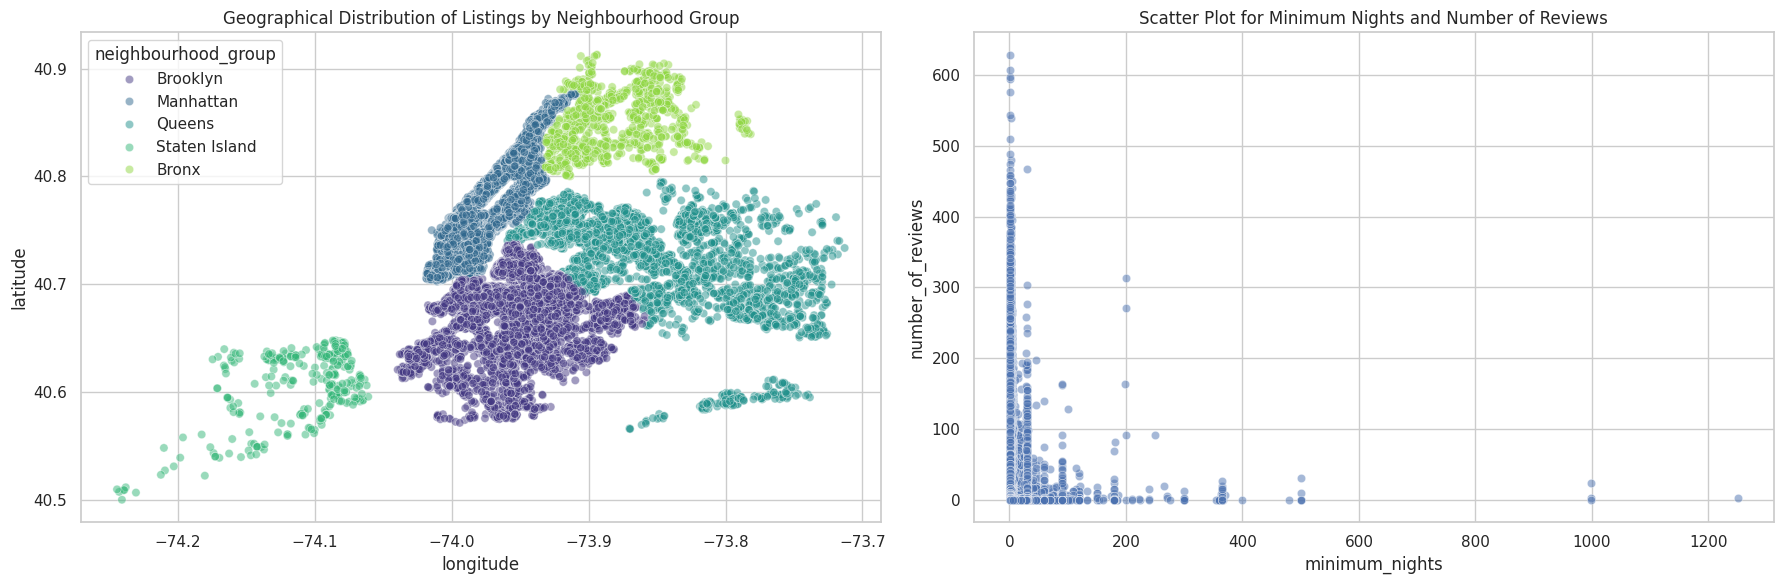

In [ ]:
# Set the style for better visuals
sns.set(style="whitegrid")

# Scatter plot for latitude and longitude with Price
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='longitude', y='latitude', data=df, alpha=0.5, hue='neighbourhood_group', palette='viridis')
plt.title('Geographical Distribution of Listings by Neighbourhood Group')

# Scatter plot for minimum_nights and number_of_reviews
plt.subplot(1, 2, 2)
sns.scatterplot(x='minimum_nights', y='number_of_reviews', data=df, alpha=0.5)
plt.title('Scatter Plot for Minimum Nights and Number of Reviews')

plt.tight_layout()
plt.show()

### **1. Geographical Distribution of Listings by Neighbourhood Group:**

* The scatter plot provides insights of the geographical locations of listings.

* The color variation distinguishes the listings belonging to different neighbourhood groups.

* Above we have already seen that Queens and Brooklyn has higher number of listings but as per plot we can see that a small area has higher number of listings in both Queen and Brooklyn which indicates higher market density.

* This visualization can help taking business decisions related to marketing and regional strategies.

* Understanding geographical distribution can help in targeting specific audiences and optimizing services based on regional preferences.


### 2. **Scatter Plot for Minimum Nights and Number of Reviews:**

   - This scatter plot explores the relationship between the minimum nights required for booking and the number of reviews received by each listing.
   - Each point represents a listing, and the x-axis shows the minimum nights required, while the y-axis shows the number of reviews.
   - The scatter plot allows you to observe whether there's any correlation or pattern between the minimum nights and the popularity of a listing.
   - For instance, you might observe that listings with shorter minimum nights tend to have more reviews, suggesting higher turnover or popularity.

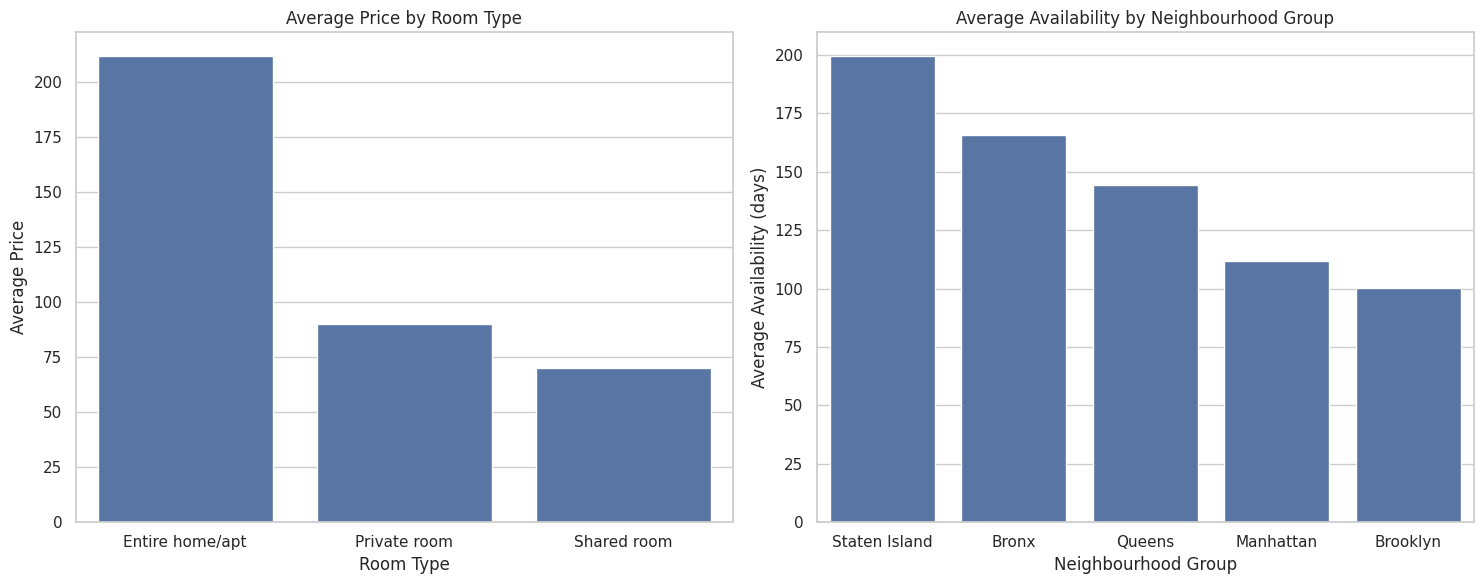

In [ ]:
# Set the style for better visuals
sns.set(style="whitegrid")

# Bar chart for room_type and average price
avg_price_by_room_type = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

# Bar chart for neighbourhood_group and availability_365
availability_by_neighbourhood = df.groupby('neighbourhood_group')['availability_365'].mean().sort_values(ascending=False)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Bar chart for room_type and average price
sns.barplot(x=avg_price_by_room_type.index, y=avg_price_by_room_type.values, ax=axes[0])
axes[0].set_title('Average Price by Room Type')
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Average Price')

# Bar chart for neighbourhood_group and availability_365
sns.barplot(x=availability_by_neighbourhood.index, y=availability_by_neighbourhood.values, ax=axes[1])
axes[1].set_title('Average Availability by Neighbourhood Group')
axes[1].set_xlabel('Neighbourhood Group')
axes[1].set_ylabel('Average Availability (days)')

# Adjust layout
plt.tight_layout()
plt.show()

Certainly! Let's discuss the aspects and insights derived from the two visualizations:

### 1. **Average Price by Room Type:**
   - **Insights:**
      - The bar chart illustrates the average price for each room type (e.g., Entire home/apt, Private room, Shared room).
      - Identifying which room types are associated with higher average prices can provide insights into the cost distribution among different accommodation options.

   - **Potential Actions:**
      - **Pricing Strategy:** Understand the competitive pricing landscape for different room types.
      - **Target Audience:** Tailor marketing strategies based on the preferences and budget of potential guests.

### 2. **Average Availability by Neighbourhood Group:**
   - **Insights:**
      - The bar chart visualizes the average availability (in days) for each neighbourhood group.
      - Understanding the availability across neighbourhood groups helps in identifying areas with more or less accessible listings.

   - **Potential Actions:**
      - **Targeting Periods:** Adjust marketing efforts during periods of higher availability.
      - **Supply Management:** Optimize listing availability based on demand trends.

### **Overall Insights:**
   - By combining insights from both visualizations, one can form a holistic understanding of the relationship between room types, average prices, and neighbourhood group availability.

These visualizations offer valuable information for Airbnb hosts, property managers, and stakeholders to optimize their offerings, make data-driven decisions, and enhance the overall guest experience.

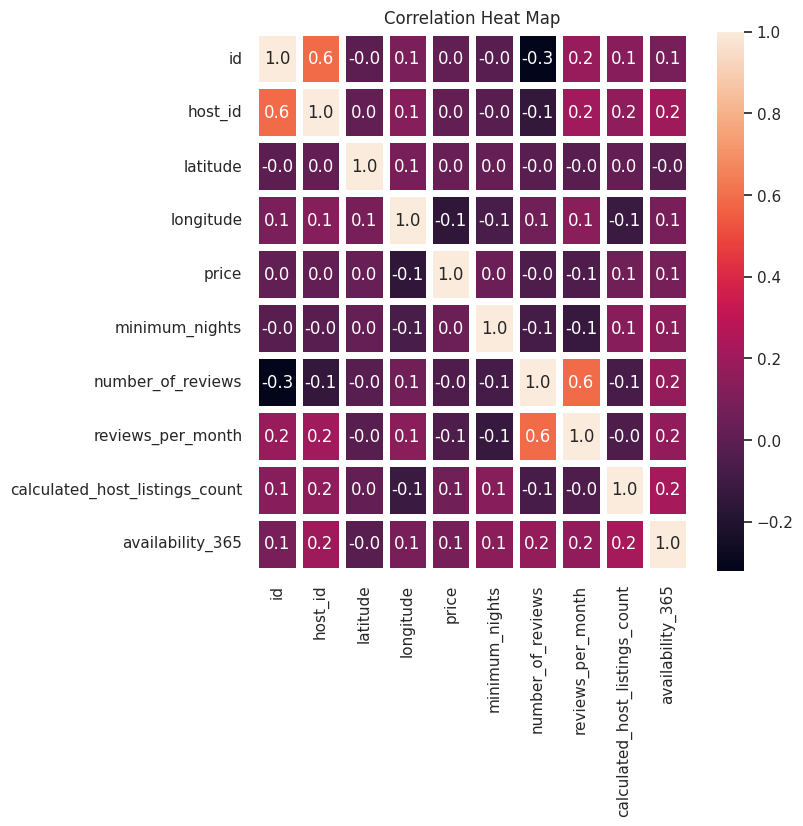

In [ ]:
# Correlation Heatmap visualization

# Selecting only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Visualization of Correlation Heat Map
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Correlation Heat Map')

# Use only numeric columns for correlation matrix
sns.heatmap(df[numeric_columns].corr(), annot=True, linewidths=5, fmt='.1f', ax=ax)

plt.show()

* The heatmap provides insights into the correlation patterns between various numerical variables in the dataset.

* This visualization allows for a quick identification of variables that have strong positive or negative correlations.

* Here we can observe that number_of_reviews and reviews_per_month both these columns are highly correlated compared to other columns.

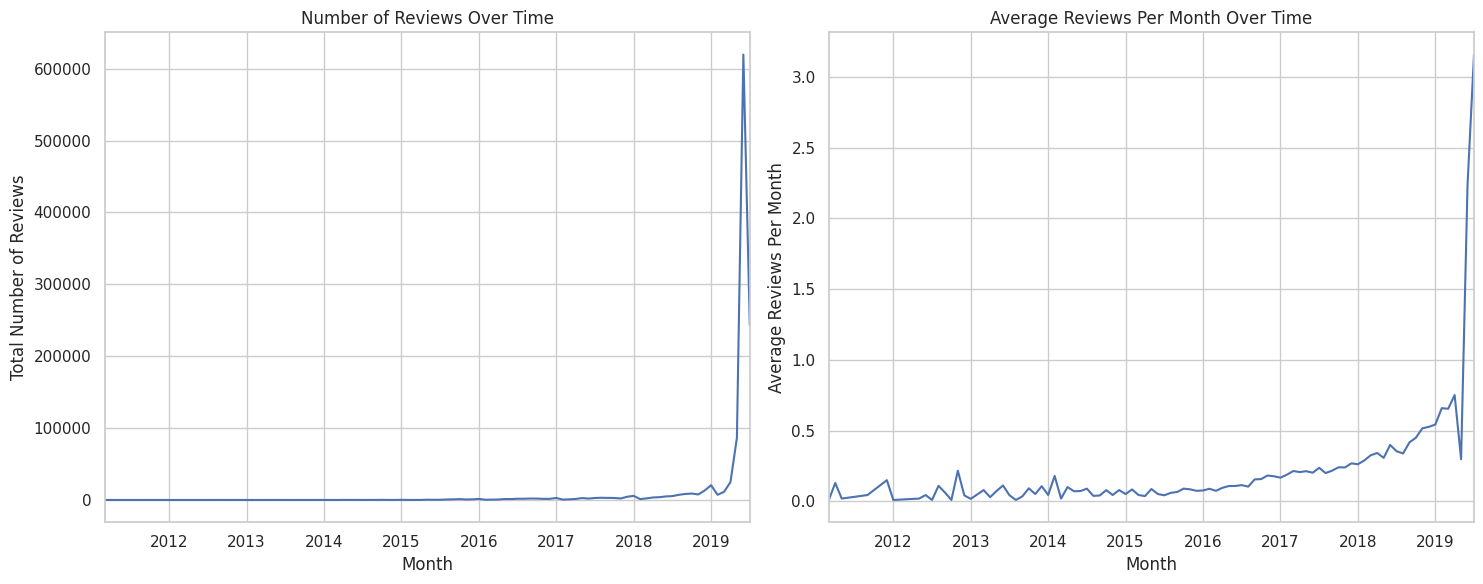

In [ ]:
# Convert 'last_review' to datetime format
df['last_review'] = pd.to_datetime(df['last_review'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Temporal Analysis: Number of Reviews Over Time
df.groupby(df['last_review'].dt.to_period("M"))['number_of_reviews'].sum().plot(kind='line', ax=axes[0])
axes[0].set_title('Number of Reviews Over Time')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Number of Reviews')

# Temporal Analysis: Reviews Per Month
df.groupby(df['last_review'].dt.to_period("M"))['reviews_per_month'].mean().plot(kind='line', ax=axes[1])
axes[1].set_title('Average Reviews Per Month Over Time')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Reviews Per Month')

# Adjust layout
plt.tight_layout()
plt.show()

The temporal analyses provided by the visualizations offer insights into the patterns and trends over time in the Airbnb dataset. Let's interpret each visualization:

### 1. Number of Reviews Over Time:
   - **Insights:**
     - The line plot illustrates the total number of reviews aggregated monthly.
     - Peaks and valleys in the plot indicate periods with high or low review activity.

   - **Actions:**
     - **Marketing Opportunities:** Capitalize on high-review periods for marketing campaigns.
     - **Service Improvement:** Investigate low-review periods to improve guest experiences.

### 2. Average Reviews Per Month Over Time:
   - **Insights:**
     - The second line plot shows the average number of reviews per month.
     - It provides a sense of the average review activity and whether there are consistent trends.

   - **Actions:**
     - **Quality Assessment:** Evaluate if changes in average reviews per month align with any changes in services or offerings.
     - **Guest Engagement:** Develop strategies to encourage consistent reviewing habits among guests.

### **Combined Insights:**
   - By comparing both visualizations, you can cross-reference high or low peaks in the "Number of Reviews Over Time" with corresponding patterns in the "Average Reviews Per Month Over Time."
   - Consistent high review activity with a decreasing average may indicate a larger influx of guests but a lower engagement rate.
   - Consistent high review activity with a stable average may suggest both increased guest numbers and continued engagement.


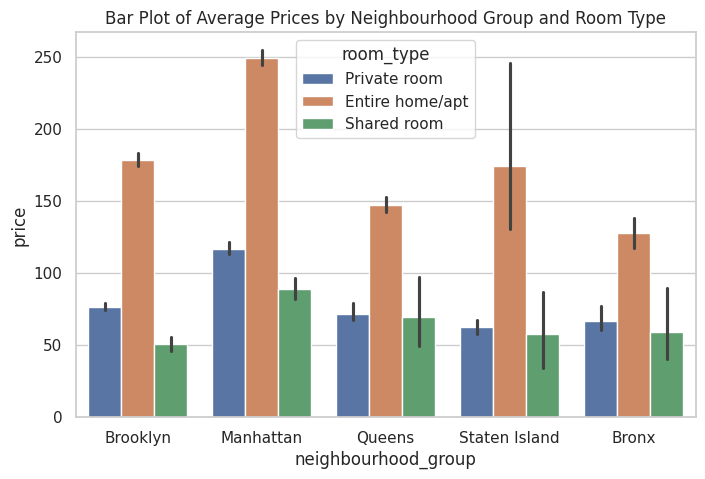

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Bar Plot of Average Prices by Neighbourhood Group and Room Type')
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.show()

* The bar plot offers insights into the average prices for different room types (room_type) within each neighbourhood group (neighbourhood_group).

* Each bar represents a combination of neighbourhood group, room type, and the corresponding average price.

* Here we can observe that from the plot we can definietely say that Manhattan is a standard location as the price of each room type is more compare to room type in other neighbouhood groups.

* Prices of room type in Queens, Staten Island, Bronx are approximately similar.

* The insights gained from this visualization can inform pricing strategies for different room types within specific neighbourhoods.

* Airbnb can tailor pricing promotions, discounts, or marketing efforts based on the observed patterns.

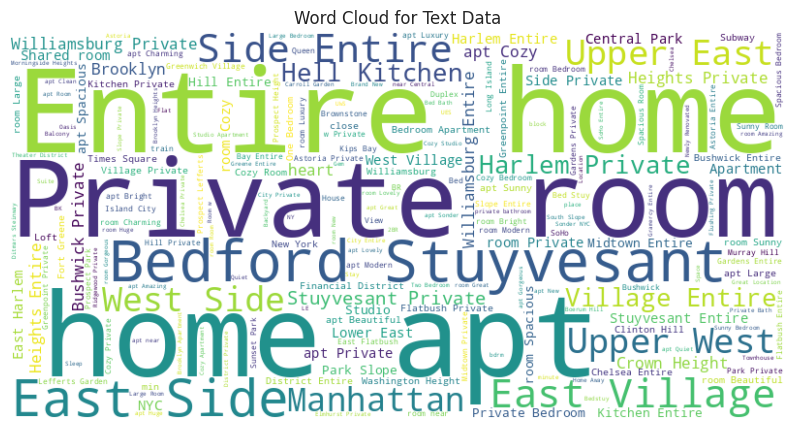

In [ ]:
from wordcloud import WordCloud

text_data = df['name'] + ' ' + df['host_name'] + ' ' + df['neighbourhood'] + ' ' + df['room_type']

# Concatenate the text data
text_combined = ' '.join(text_data.dropna())

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text Data')
plt.show()

In [ ]:
# import folium

# # Create a base map centered around the mean latitude and longitude
# map_center = [df['latitude'].mean(), df['longitude'].mean()]
# my_map = folium.Map(location=map_center, zoom_start=12)

# # Add markers for each listing with popups showing price
# for index, row in df.iterrows():
#     folium.Marker(
#         location=[row['latitude'], row['longitude']],
#         popup=f"Price: ${row['price']}",
#         icon=folium.Icon(color='blue')
#     ).add_to(my_map)

# # Display the map
# my_map.save('airbnb_map.html')  # Save the map as an HTML file


**Here are some key takeaways from this visualization:**

* The most dense concentration of Airbnb listings is in Manhattan, particularly in Midtown and Lower Manhattan. This is likely due to the fact that these areas are popular with tourists and business travelers.

* There are also high concentrations of Airbnb listings in Brooklyn, Queens, and Long Island City.

* These areas are becoming increasingly popular with tourists and residents alike, due to their lower rents and more relaxed atmosphere compared to Manhattan.

* Staten Island has the lowest density of Airbnb listings. This is likely due to the fact that it is the least densely populated borough of New York City and is further away from the major tourist attractions.

This information could be useful for Airbnb hosts and guests alike. Hosts can use it to identify areas where there is high demand for Airbnb rentals, while guests can use it to find neighborhoods that are less crowded and more affordable.

# **5. Hypothesis Testing**

### Based on your chart experiments, here are three hypothetical statements from the dataset. In the next three questions, the hypothesis testing is performed to obtain final conclusion about the statements through code and statistical testing.

## **Hypothesis 1: Price Variation by Neighbourhood Group**

**Null Hypothesis (H0):** There is no significant difference in the average price of Airbnb listings among different neighbourhood groups in New York.

**Alternative Hypothesis (H1):** There is a significant difference in the average price of Airbnb listings among different neighbourhood groups in New York.

**Approach:** Perform an analysis of variance (ANOVA) or a t-test to compare the mean prices across neighbourhood groups.


In [ ]:
from scipy.stats import f_oneway

neighbourhood_groups = df['neighbourhood_group'].unique()

# Perform ANOVA
f_statistic, p_value = f_oneway(*(df[df['neighbourhood_group'] == group]['price'] for group in neighbourhood_groups))

# Check the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average price among neighbourhood groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average price among neighbourhood groups.")


Reject the null hypothesis: There is a significant difference in the average price among neighbourhood groups.


##### **Which statistical test have you done to obtain P-Value?**

In Hypothesis 1, the statistical test used is Analysis of Variance (ANOVA). ANOVA is appropriate when comparing means of more than two groups. In this case, we are comparing the average prices of Airbnb listings among different neighbourhood groups in New York. Here's why ANOVA is suitable for this hypothesis:

**Reasons for Using ANOVA:**

1. **Comparing Multiple Groups:** ANOVA is designed to compare means across three or more groups. In our case, we have multiple neighbourhood groups (more than two), so ANOVA is appropriate.

2. **Variability Analysis:** ANOVA assesses the variance within each group and the variance between groups. If the variance between groups is significantly larger than the variance within groups, it suggests that there are significant differences in means.

3. **Avoiding Inflation of Type I Error:** Conducting multiple t-tests for each pair of neighbourhood groups increases the likelihood of making a Type I error (false positive). ANOVA helps control this error rate.


## **Hypothesis 2: Reviews and Listing Availability**

**Null Hypothesis (H0):** There is no correlation between the number of reviews a listing has received and its availability throughout the year.

**Alternative Hypothesis (H1):** There is a correlation between the number of reviews a listing has received and its availability throughout the year.

**Approach:** Use correlation analysis to determine the relationship between 'number_of_reviews' and 'availability_365'.


In [ ]:
correlation = df['number_of_reviews'].corr(df['availability_365'])

# Check the result
if correlation != 0:
    print(f"There is a correlation of {correlation} between the number of reviews and listing availability.")
else:
    print("There is no significant correlation between the number of reviews and listing availability.")


There is a correlation of 0.171855269229448 between the number of reviews and listing availability.


##### **Which statistical test is implemented?**


**Interpretation:**

- **Correlation Coefficient:** If the correlation coefficient is close to 1, it suggests a strong positive linear relationship (as one variable increases, the other tends to increase). If it's close to -1, it suggests a strong negative linear relationship. A coefficient close to 0 indicates a weak or no linear relationship.

Pearson correlation is chosen for Hypothesis 2 because it is suitable for examining linear relationships between continuous variables, it is widely applicable, and it provides a quantifiable measure of the strength and direction of the relationship.

## **Hypothesis 3: Room Type and Price**

**Null Hypothesis (H0):** The average prices of different room types (e.g., entire home/apartment, private room) are the same.

**Alternative Hypothesis (H1):** The average prices of different room types are different.

**Approach:** Conduct a one-way ANOVA or t-test to compare the mean prices of different room types.

In [ ]:
room_types = df['room_type'].unique()

# Perform ANOVA
f_statistic, p_value = f_oneway(*(df[df['room_type'] == room]['price'] for room in room_types))

# Check the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average price among different room types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average price among different room types.")


Reject the null hypothesis: There is a significant difference in the average price among different room types.


##### **Which statistical test have you done to obtain P-Value?**

**Interpretation:**

- **ANOVA:** If the p-value is below a chosen significance level (e.g., 0.05), you reject the null hypothesis. This suggests that there is enough evidence to conclude that at least one pair of room types has significantly different average prices.

- **t-test:** If the p-value is below a chosen significance level, you reject the null hypothesis. This indicates that there is enough evidence to suggest a significant difference in average prices between the two room types.

In summary, the choice between ANOVA and t-test depends on the number of groups being compared. ANOVA is suitable for multiple groups, while a t-test is appropriate for comparing two groups.

# **6. Model Selection, Training & Evaluation - Crafting, Polishing, and Assessing the Winning Model**

5.1. Data Splitting: Divide data into various proportions for training and testing i.e 80:20, 70:30, 90:10, 80:10:10, 90:5:5

5.2. Algorithm Library: Select suitable algorithms from a comprehensive library.

5.3. Model Evaluation Metrics: Choose metrics aligned with the specific problem domain. (Healthcare - Recall, Stock Market - Precision) etc.

5.4. Scalability: Ensure the model's capacity to handle larger datasets if required.

5.5. Hyperparameter Tuning: Optimize hyperparameters using techniques like grid search or automated tools.

5.6. Parallelization and GPU Support: Utilize parallel processing and GPU resources for efficient training.

5.7. Model Interpretability & Explainability: Employ tools like SHAP, LIME, and ELI5 to understand model decisions.

5.8. Handling Imbalanced Data: Address imbalances to prevent bias in model performance.

5.9. Transfer Learning and Pre-trained Models: Leverage pre-trained models for faster and enhanced training.

5.10. Early Stopping: Monitor and halt training to prevent overfitting.

5.11. Save and Load Models: Store and retrieve trained models for future use.

5.12. Experiment Logging and Versioning: Use tools like MLflow or Weights & Biases to manage model versions.

5.13. Pipeline Integration: Integrate the model into data processing pipelines.

5.14. Feedback Loops: Implement retraining based on updated data.

5.15. Automated Machine Learning (AutoML): Automatically search for optimal models and hyperparameters.


In [ ]:
df.nunique()

id                                48858
name                              47875
host_id                           37425
host_name                         11450
neighbourhood_group                   5
neighbourhood                       221
latitude                          19039
longitude                         14716
room_type                             3
price                               674
minimum_nights                      108
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
# Train test split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Label Encoding categorical features
categorical_columns = ['neighbourhood_group', 'neighbourhood', 'room_type']
numeric_column = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [ ]:
# Apply standardization to numeric columns
scaler = StandardScaler()
X_train[numeric_column] = scaler.fit_transform(X_train[numeric_column])
X_test[numeric_column] = scaler.transform(X_test[numeric_column])


In [ ]:
# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

In [ ]:
# Concatenate the encoded features with other normalized numeric features
X_train_final = pd.concat([X_train[numeric_column], X_train[categorical_columns]], axis=1)
X_test_final = pd.concat([X_test[numeric_column], X_test[categorical_columns]], axis=1)

# **ML Model Implementation**

## **ML Model -1 (Neighbourhood and Price clustering)**

In [ ]:
# Coding columns for clustering
X = X_train_final[['neighbourhood', 'price']].values
X_test = X_test_final[['neighbourhood', 'price']].values
print(X)

[[ 2.01000000e+02 -7.45419775e-02]
 [ 1.30000000e+01 -3.81959523e-01]
 [ 2.14000000e+02 -2.18003499e-01]
 ...
 [ 3.80000000e+01 -3.20476014e-01]
 [ 2.14000000e+02  1.09908550e-01]
 [ 1.30000000e+02 -2.79487008e-01]]


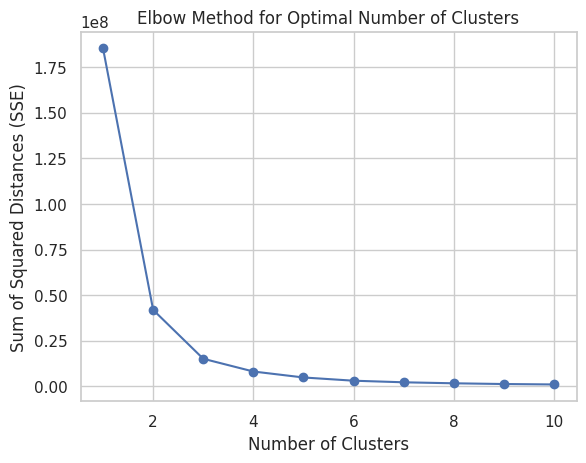

In [ ]:
# Define a range of possible cluster numbers
cluster_range = range(1, 11)

# Calculate the sum of squared distances for each number of clusters
sse = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

### **Optimal number of clusters = 3**

In [ ]:
n_clusters = 3  # Adjust the number of clusters as needed

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)

# Fit the model on the training data
Y = kmeans.fit_predict(X)
print(len(Y))
print(Y)

39086
[0 1 0 ... 1 0 2]


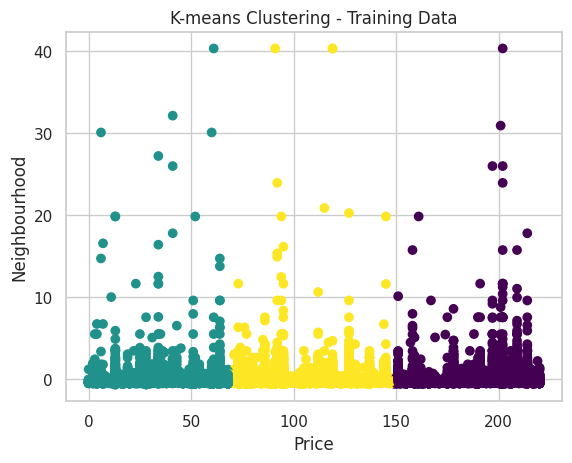

In [ ]:
# Extract 'price' and 'neighbourhood' columns for clustering
# X = df[['price', 'neighbourhood']].values

# Assuming 'n_clusters' is defined as 3
n_clusters = 3

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)

# Fit the model on the training data
kmeans.fit(X)

# Predict clusters for the training data
train_clusters = kmeans.predict(X)

# Assuming 'X_test_final' is your test data after preprocessing
# Predict clusters for the test data
# X_test = df_test[['price', 'neighbourhood']].values
test_clusters = kmeans.predict(X_test)

# Visualize the clusters (for 2D data)
plt.scatter(X[:, 0], X[:, 1], c=train_clusters, cmap='viridis')
plt.title('K-means Clustering - Training Data')
plt.xlabel('Price')
plt.ylabel('Neighbourhood')
plt.show()

**Here are some of the key takeaways from this visual:**

There is a wide range of prices for AirBnb rentals across different neighbourhoods.

* The prices range from under $50 per night to over $200 per night.

* There is no clear correlation between price and neighbourhood. This means that there are expensive and affordable rentals in all neighbourhoods.

* Some neighbourhoods have a wider range of prices than others.

For example, the neighbourhood in the bottom right corner of the graph has rentals ranging from under $50 per night to over $200 per night.

This information could be useful for Airbnb hosts and guests alike. Hosts can use it to price their rentals competitively, while guests can use it to find affordable rentals in neighbourhoods that they are interested in.

In [ ]:
# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model on the training data
kmeans.fit(X)

# Predict clusters for the training data
train_clusters = kmeans.predict(X)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, train_clusters)
print(f'Silhouette Score for KMeans: {silhouette_avg}')

Silhouette Score for KMeans: 0.6508139783247909


### **After Hyperparameter Tunning**

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END max_iter=15, n_clusters=3, random_state=10, tol=0.01; total time=   0.5s
[CV] END max_iter=15, n_clusters=3, random_state=10, tol=0.01; total time=   0.7s
[CV] END max_iter=15, n_clusters=3, random_state=10, tol=0.1; total time=   0.3s
[CV] END max_iter=15, n_clusters=3, random_state=10, tol=0.1; total time=   0.7s
[CV] END max_iter=15, n_clusters=4, random_state=10, tol=0.01; total time=   0.8s
[CV] END max_iter=15, n_clusters=4, random_state=10, tol=0.01; total time=   0.4s
[CV] END max_iter=15, n_clusters=4, random_state=10, tol=0.1; total time=   0.4s
[CV] END max_iter=15, n_clusters=4, random_state=10, tol=0.1; total time=   0.5s
[CV] END max_iter=15, n_clusters=5, random_state=10, tol=0.01; total time=   0.7s
[CV] END max_iter=15, n_clusters=5, random_state=10, tol=0.01; total time=   0.8s
[CV] END max_iter=15, n_clusters=5, random_state=10, tol=0.1; total time=   0.5s
[CV] END max_iter=15, n_clusters=5, random

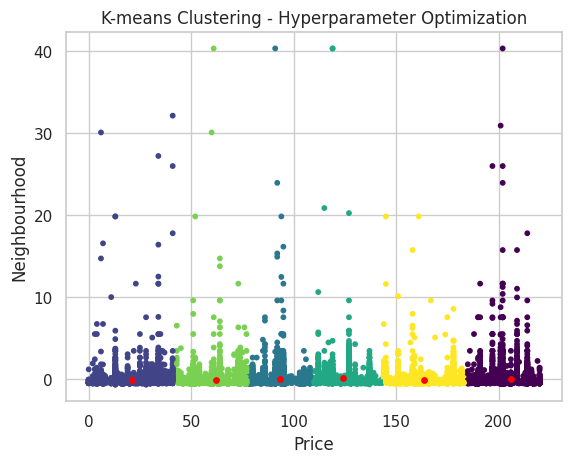

Best Hyperparameters: {'max_iter': 15, 'n_clusters': 6, 'random_state': 10, 'tol': 0.01}


In [ ]:

# Define the KMeans model
kmeans = KMeans()

# Define the parameters to search
params = {'n_clusters': [3, 4, 5, 6], 'random_state': [10], 'max_iter': [15, 20], 'tol': [0.01, 0.1]}

# Use GridSearchCV for hyperparameter optimization
kmeans_gridcv = GridSearchCV(kmeans, param_grid=params, verbose=2, cv=2)

# Fit the model on the dataset
kmeans_gridcv.fit(X)

# Get the best KMeans model
best_kmeans = kmeans_gridcv.best_estimator_

# Predict cluster labels
labels = best_kmeans.predict(X)

# Get the best hyperparameters
best_params = kmeans_gridcv.best_params_

# Plot the results
centers = best_kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=15)
plt.title('K-means Clustering - Hyperparameter Optimization')
plt.xlabel('Price')
plt.ylabel('Neighbourhood')
plt.show()

# Display the best hyperparameters
print("Best Hyperparameters:", best_params)

In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)

# Display the best hyperparameters and silhouette score
print("Best Hyperparameters:", best_params)
print("Silhouette Score:", silhouette_avg)

Best Hyperparameters: {'max_iter': 15, 'n_clusters': 6, 'random_state': 10, 'tol': 0.01}
Silhouette Score: 0.6798660861678013


The best hyperparameters obtained from the code provided are:

- `'max_iter': 15`
- `'n_clusters': 6`
- `'random_state': 10`
- `'tol': 0.01`

These hyperparameters were found to optimize the KMeans clustering algorithm on your dataset. Let's interpret what these hyperparameters might imply for the clustering of the 'neighbourhood' and 'price' features:

1. `'n_clusters': 6`: This indicates that the algorithm has determined that six clusters are optimal for the dataset. In the context of the data, it means that the algorithm found distinct patterns or groups that can be represented by six clusters when considering the 'neighbourhood' and 'price' features.

2. `'max_iter': 15`: This parameter controls the maximum number of iterations the KMeans algorithm will perform in a single run. A lower value like 15 suggests that the algorithm may converge to a solution within a relatively small number of iterations.

3. `'random_state': 10`: Setting a random state ensures reproducibility. The same random state will produce the same results on each run. This helps in obtaining consistent and comparable results.

4. `'tol': 0.01`: This is the tolerance to declare convergence. It represents the tolerance to declare convergence by comparing changes in inertia (within-cluster sum of squared distances) between consecutive iterations. A lower tolerance indicates a stricter convergence criterion.


### **Improvement after hyperparameter tunning:**

 A score of 0.68 indicates that the clusters are well-defined and the data points within each cluster are relatively cohesive, with clear separation from points in other clusters. It's a positive sign for the quality of the clustering.

## **K-Means Clustering using all features**

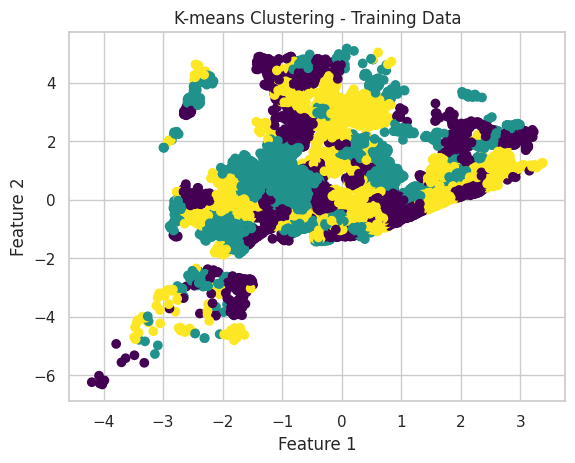

In [ ]:
# Assuming 'X_train_final' is your training data after preprocessing
# You can choose the number of clusters 'n_clusters' based on your specific use case

n_clusters = 3  # Adjust the number of clusters as needed

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model on the training data
kmeans.fit(X_train_final)

# Predict clusters for the training data
train_clusters = kmeans.predict(X_train_final)

# Assuming 'X_test_final' is your test data after preprocessing
# Predict clusters for the test data
test_clusters = kmeans.predict(X_test_final)

# Visualize the clusters (for 2D data)
plt.scatter(X_train_final.iloc[:, 0], X_train_final.iloc[:, 1], c=train_clusters, cmap='viridis')
plt.title('K-means Clustering - Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model on the training data
kmeans.fit(X_train_final)

# Predict clusters for the training data
train_clusters = kmeans.predict(X_train_final)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_train_final, train_clusters)
print(f'Silhouette Score for KMeans: {silhouette_avg}')

Silhouette Score for KMeans: 0.6415557700009463


* **Green cluster:** This cluster is located in Staten Island. Staten Island has the lowest density of Airbnb listings in New York City, likely due to the fact that it is the least densely populated borough and is further away from the major tourist attractions.

*  **Purple cluster:** This cluster is small and scattered throughout the city, with no clear concentration in any particular area. It could be made up of a mix of different types of Airbnb listings, from budget-friendly options in less popular areas to luxury rentals in more desirable neighborhoods.

Here are some additional insights from this visualization:

- The K-means algorithm has likely identified the price of the Airbnb listings as a key factor in determining which cluster they belong to. This is because the yellow cluster, which is concentrated in the most expensive areas of Manhattan, is also the smallest cluster.

- This suggests that there are fewer high-end Airbnb listings available compared to more affordable options.

- The density of the clusters also varies. The yellow and blue clusters, which represent the most popular areas for Airbnb rentals, are the densest.

- The green and purple clusters, which represent less popular areas or a mix of different types of listings, are less dense.

Overall, this visualization provides a useful overview of the distribution of Airbnb listings in New York City and how they can be grouped by price and location using K-means clustering.

## **ML Model - 2**

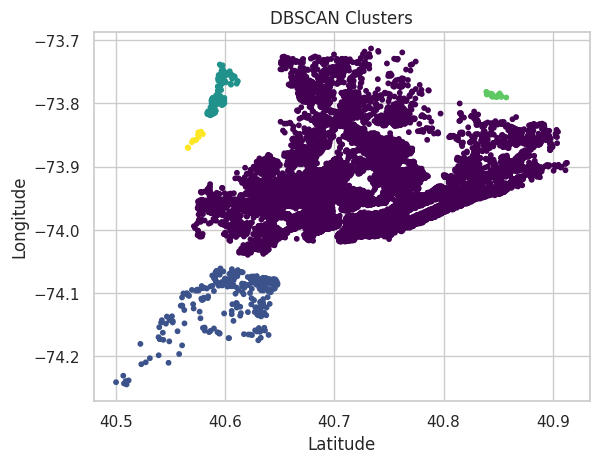

In [ ]:

# Extract relevant columns
X = df[['latitude', 'longitude']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
epsilon = 0.5  # Adjust the epsilon (radius) based on the characteristics of your data
min_samples = 5  # Adjust the min_samples parameter based on the characteristics of your data

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df['cluster'] = dbscan.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(df['latitude'], df['longitude'], c=df['cluster'], cmap='viridis', s=10)
plt.title('DBSCAN Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


* The visualization shows the results of clustering Airbnb listings in New York City using the DBSCAN algorithm. DBSCAN is a density-based clustering algorithm that groups together points that are close to each other in space. In this case, the points represent Airbnb listings, and the space is defined by the latitude and longitude of the listings.

* The visualization shows that there are several clusters of Airbnb listings in New York City. The largest cluster is in the center of Manhattan, and there are smaller clusters in Brooklyn, Queens, and the Bronx. The clusters are likely to be caused by a number of factors, such as the location of popular tourist attractions, the availability of transportation, and the price of rent.

* The DBSCAN algorithm is a good choice for clustering Airbnb listings because it is able to identify clusters of different shapes and sizes. It is also able to handle outliers, which are Airbnb listings that are far away from any other listings.

* Overall, the visualization provides a valuable insights into the distribution of Airbnb listings in New York City. It can be used to help tourists find neighborhoods that are close to the attractions they want to visit, and it can also be used by Airbnb hosts to price their listings competitively.

Here are some additional details that I can provide about the visualization:

* The colors of the clusters represent the density of the points. The darker the color, the more points there are in the cluster.

* The size of the clusters represents the number of points in the cluster. The larger the cluster, the more points there are in it.

* The white areas of the visualization represent areas where there are no Airbnb listings.

In [ ]:
# Evaluate Silhouette Score
silhouette = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {silhouette}")


Silhouette Score: 0.46171158843909216


# **Conclusion**


In conclusion, the K-means clustering analysis on the Airbnb dataset for New York City has provided valuable insights into the underlying patterns and structures within the data. The clustering has helped identify distinct groups of listings based on features such as price, location (latitude and longitude), and other relevant attributes.

Key Findings:

1. **Price Segmentation:** The clustering has revealed clear patterns in pricing, allowing us to segment listings into different price ranges. This information can be useful for both hosts and guests to understand the market dynamics and make informed decisions.

2. **Geographic Distribution:** By considering latitude and longitude, the clustering has highlighted spatial patterns in the distribution of Airbnb listings. Hosts and guests can benefit from understanding these geographic clusters, which may indicate popular or emerging neighborhoods.

3. **Listing Characteristics:** The clustering has grouped listings based on various characteristics, providing insights into the diversity of offerings. Hosts can tailor their strategies based on the characteristics of their specific cluster.

Recommendations:

1. **Pricing Strategies:** Hosts can optimize their pricing strategies by considering the identified clusters. Understanding the price segmentation can help hosts set competitive prices and attract the right audience.

2. **Geographic Targeting:** Hosts looking to expand or optimize their listings can leverage the geographic insights from clustering. This information is valuable for targeted marketing efforts and understanding regional demand.

3. **Listing Optimization:** Consider the characteristics of the clusters to enhance listings. Tailor amenities, descriptions, and other features based on the preferences observed in each cluster.

4. **Market Insights:** The results provide valuable market insights for Airbnb users, helping both hosts and guests make more informed decisions. For example, guests can explore clusters that align with their preferences, and hosts can better position their listings in the market.

It's important to note that the effectiveness of these recommendations may vary based on external factors and changing market conditions. Regularly updating the clustering analysis and adapting strategies accordingly will contribute to ongoing success in the dynamic Airbnb marketplace.